In [13]:
import pandas as pd
import json
# import functions as f
import pickle
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

In [30]:
file = '/home/xristsos/flatiron/projects/birthday pickles/electronic_dataframeFINAL.pickle'
df = pickle.load(open(file,'rb'))

In [9]:
df.drop(columns=['genre','analysis_url','uri','type','id','track_href'],inplace=True)
df.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,0.2780,0.694,185195,0.758,0.000001,11,0.1020,-2.986,1,0.2180,192.091,4,0.371
1,0.1570,0.842,212500,0.801,0.000005,8,0.0642,-4.167,0,0.2280,95.881,4,0.617
2,0.0771,0.652,205947,0.713,0.000010,8,0.1440,-5.311,1,0.0368,100.023,4,0.152
3,0.0244,0.819,195429,0.859,0.000000,8,0.0916,-6.264,1,0.2240,104.906,4,0.612
4,0.0203,0.586,220573,0.701,0.000000,1,0.0550,-5.326,0,0.0416,104.957,4,0.254


In [28]:
##### some quick plotting
import plotly.graph_objects as go

fig = go.Figure(data=go.Heatmap(
                   z=df.corr(),
                   x=list(df.columns),
                   y=list(df.columns)))
fig.show()

In [15]:
####### scaling ##########
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(df)
###Calculate PCA and plot results
from sklearn.decomposition import PCA
pca = PCA(n_components=11)
pca_data = pca.fit_transform(X)
df_pca = pd.DataFrame(data=pca_data,columns=[1,2,3,4,5,6,7,8,9,10,11])

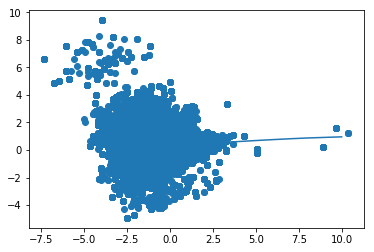

In [17]:
plt.scatter(pca_data[:,1],pca_data[:,4])
plt.plot(np.cumsum(pca.explained_variance_ratio_))

Text(0, 0.5, 'proportion of explained variance')

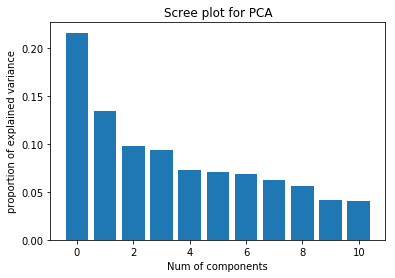

In [20]:
index = np.arange(11)
plt.bar(index, pca.explained_variance_ratio_)
plt.title('Scree plot for PCA')
plt.xlabel('Num of components')
plt.ylabel('proportion of explained variance')

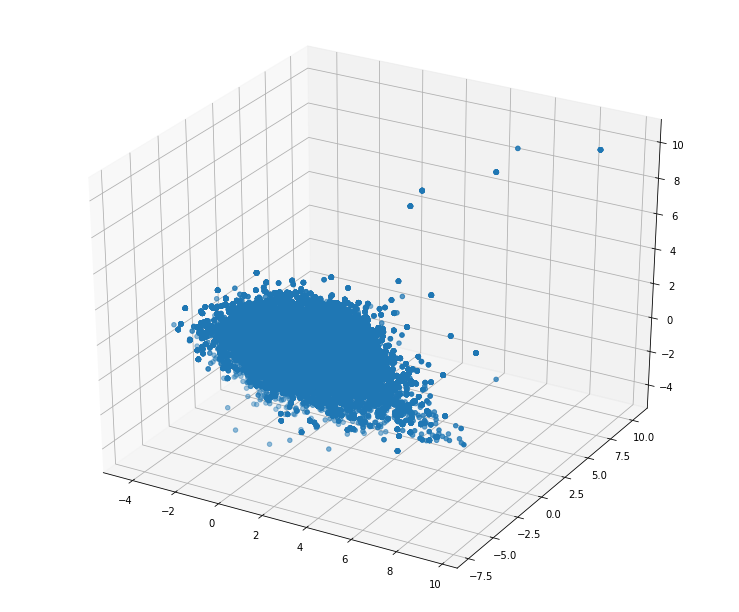

In [24]:
fig = plt.figure(figsize=(13,11))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_pca[1], df_pca[2], df_pca[4])
plt.show()

In [39]:
df.dropna(inplace=True)

In [42]:
##### interesting stuff i can't look at right now
fig2 = go.Figure(data=go.Heatmap(
                   z=df.groupby('genre').mean().corr(),))
fig2.show()